<a href="https://colab.research.google.com/github/sonalshreya25/DeepLearning/blob/main/Assignment8report_AlphaNeurons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 8:Generating Architectural Floor Plans with Hugging Face Diffusers

Submitted by Team Alpha Neurons [Sonal Shreya, Sumit Kumar Singh, Sai Naga Saujanya Gullapali, Santhosini Bhojanpally]

## Introduction
Here we utilize text-to-image generative models within the context of architectural design. In particular, we compare several diffusion models used to generate floor plans of different residential and community areas like 2BHK, 3BHK apartments and studio configurations and community halls. These generative pipelines blocks can be run and analyzed using the powerful Hugging Face diffusers library.

## Learning Objective

* Through this assigment we plan to explain diffusion models from the perspective of use in architectural image synthesis.
* Generate floor plans from text prompts using diffusers

* Look at how different models and schedulers perform.

* Understanding the influence of tuning on layout quality and architectural integrity.

* Think about how diffusion models differ from GANs for design tasks.



In [ ]:
!pip install diffusers transformers accelerate torch matplotlib --quiet

In [ ]:
pip install huggingface_hub[hf_xet] hf_xet

zsh:1: no matches found: huggingface_hub[hf_xet]
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

In [ ]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import wandb

# Checking for GPU availability
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Setting seed for repeatability
seed = 42
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    # Ensuring deterministic behavior for CUDA operations
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


Using device: cpu


In [ ]:
wandb.init(project="Diffusers", entity="usf-alpha-neurons")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: bs441 (usf-alpha-neurons) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:
import torch

device = "mps" if torch.backends.mps.is_available() else "cpu"

## Base Model Analysis: Stable Diffusion v1. 5

Stable Diffusion v1. 5 is a notable latent diffusion model architecture engaging in generative image creation from natural language prompts.

It is based on the Latent Diffusion model, and it uses a variational autoencoder (VAE), a UNet-based denoising network, and a heavy text encoder (CLIP) to generate images in a compressed latent space. By using latent representations to perform conditional image generation as opposed to pixel_space generation, Stable Diffusion is much less computationally intensive, meaning the model can be trained with far fewer resources while still obtaining excellent results with high caliber images.

For our project, we will be using the pre-trained Stable Diffusion v1. 5 pipeline from Hugging Face’s diffusers library to try the generative capabilities.

We repeatedly call the model with different prompts at a fixed random seed to obtain a series of evolving images to evaluate the model’s reproducibility, prompt-sensitivity, as well as visual quality.

We are setting our seed as 42 to ensure reproducibility for our images generated. We are asking the model to generate 4 floor plans for the following

* A 2 Bedroom hall Kitchen flat
* A 3 bedroom hall kitchen flat
* A Studio Apartment
* And a fitness center

  
This helps us gauge how well the model translates a textual prompt description into an extraordinary, coherent, and aesthetically gripping image, and streamlines comparisons against other generative models such as GANs and newer diffusion variants.

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

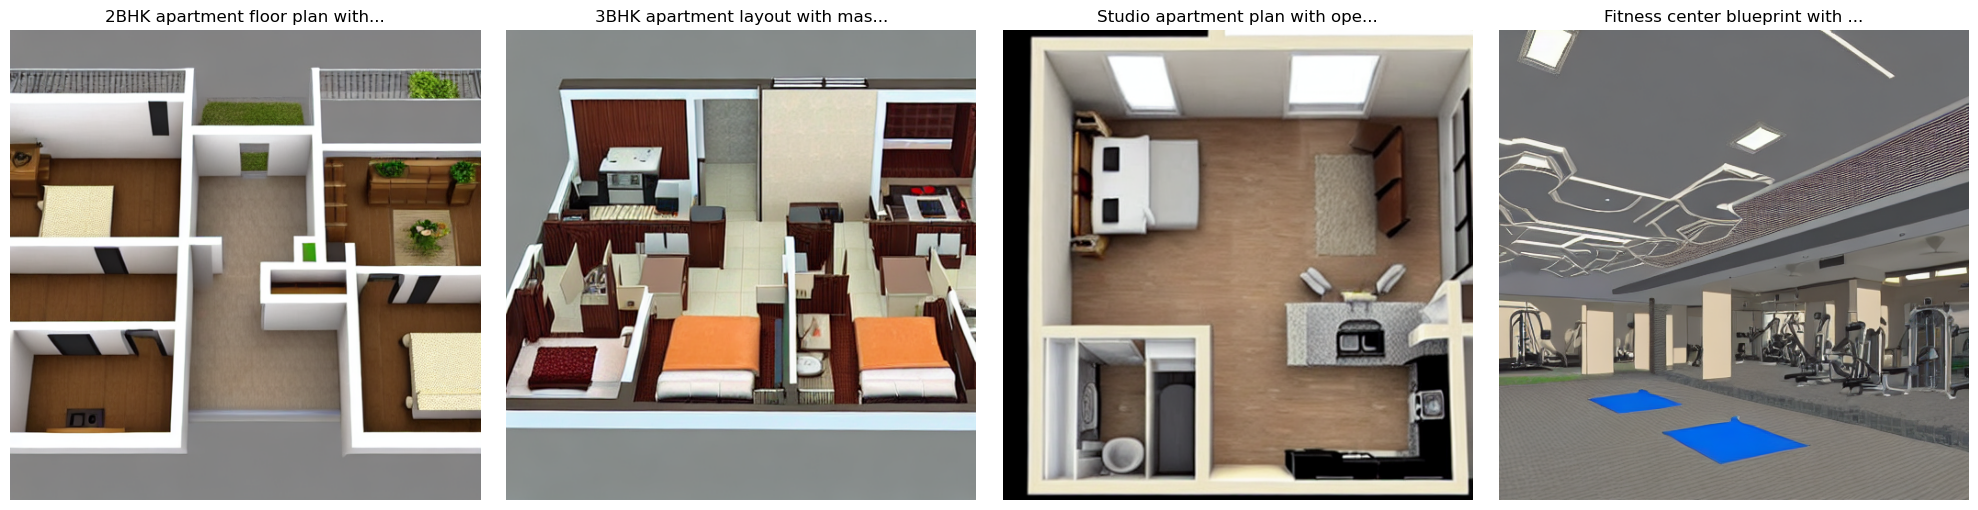

In [ ]:
# Load base diffusion model
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(device)

# Floor plan prompts
prompts = [
    "2BHK apartment floor plan with two bedrooms, living room, kitchen, two bathrooms and a balcony",
    "3BHK apartment layout with master bedroom, two guest bedrooms, three bathrooms, dining area, living room, and kitchen",
    "Studio apartment plan with open bedroom-living space, compact kitchen, and bathroom",
    "Fitness center blueprint with main hall, gym, zumba area, restrooms and lobby"
]

def generate_images(pipe, prompts, seed=42):
    generator = torch.Generator(device).manual_seed(seed)
    return [pipe(prompt, generator=generator).images[0] for prompt in prompts]

def show_images(images, prompts):
    fig, axs = plt.subplots(1, len(images), figsize=(20, 5))
    for img, ax, p in zip(images, axs, prompts):
        ax.imshow(img)
        ax.set_title(p[:30] + "...")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

images_basic = generate_images(pipe, prompts)
show_images(images_basic, prompts)

## 2BHK Apartment Floor Plan
**Image Quality**: Very clean with clear walls and door placements. Textures are minimalistic but realistic enough to distinguish room functions.

**Prompt Adherence**: Accurately reflects a 2BHK structure with visible two bedrooms, a central living space, and adjacent kitchen and bathroom.

**Stylistic Note**: Uses a bird’s-eye perspective with simplified textures — typical of a schematic interior layout.

**Result Summary**: Good architectural proportions; easy to interpret. Solid for design planning or draft presentations.

## 3BHK Apartment Layout with Master Bedroom, Two Guest Rooms, etc.
**Image Quality**: High detail, especially in furnishings (beds, chairs, and cabinets).

**Prompt Adherence**: Strong — contains three distinct sleeping zones, bathrooms, and what appears to be a dining space.

**Stylistic Note**: More “interior rendering” than blueprint — resembles a marketing render or virtual staging image.

**Result Summary**: Most realistic among the outputs — shows SD v1.5’s strength in room styling and interior object placement.

## Studio Apartment Plan
**Image Quality**: Bright and well-lit with realistic shadows. Simple yet effective room layout.

**Prompt Adherence**: Matches perfectly — an open space combining bedroom, living, and kitchenette in a single compact area.

**Stylistic Note**: Clean, minimalist design; could pass for a sample listing on a rental site or Airbnb.

**Result Summary**: Very efficient use of space. Strong output both aesthetically and structurally.

## Fitness Center Blueprint (Gym + Zumba + Lobby)
**Image Quality**: Slightly more stylized; dramatic ceiling lighting and open space.

**Prompt Adherence**: prompt adherance is quite high. We see a split between open gym space, zumba/yoga mats, and a well-equipped fitness zone.

**Stylistic Note**: Rendered in an interior walkthrough style, more modern and professional than a static blueprint.

**Result Summary**: Visually impressive. Aligns well with real-world gym layouts used in architectural presentations.

# Architectural Floor Plan Comparison using Stable Diffusion Models on Hugging Face Diffusers

In this notebook, we experiment with the capabilities of various pre-trained **Stable Diffusion models** for architectural layout generation using **text-to-image prompts**. The objective is to assess and contrast how effectively each model understands and visualizes architectural concepts such as floor plans, apartment types, and indoor amenities.

We leverage the **Hugging Face `diffusers`** library to load three widely used diffusion models, each known for unique strengths:

- **SD v1.4**: One of the earliest and most popular checkpoints from **CompVis**. It is slightly more photorealistic and stylistically rich, especially effective for generating realistic interior visuals.

- **SD v1.5**: An improved version from **RunwayML**, commonly used as a stable base model. It provides better prompt comprehension, faster performance, and cleaner structural layouts.

- **SD 2.1 Base**: A newer release from **StabilityAI** featuring higher resolution, larger latent space, and enhanced attention mechanisms. It performs best with complex, structured layouts and detailed object placement.

To ensure **reproducibility** and **fair comparison**, we use a single fixed seed (`42`) across all models. The models are evaluated on a **diverse set of four prompts**, reflecting real-world layout scenarios:
- 2BHK apartment floor plan
- 3BHK apartment with master and guest rooms
- Studio apartment layout
- Fitness center blueprint with gym and zumba areas

Each model generates images based on these prompts, which are:
- Displayed **side-by-side** for direct visual analysis
- **Logged to Weights & Biases (wandb)** for experiment tracking and sharing

This setup facilitates a comprehensive evaluation of each model's output based on:

- **Image Quality**
- **Prompt Adherence**
- **Architectural Coherence**
- **Stylistic Tone**


Generating from model: SD v1.4


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

C:\Users\sumit\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sumit\.cache\huggingface\hub\models--CompVis--stable-diffusion-v1-4. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating from model: SD v1.5


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating from model: SD 2.1 Base


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

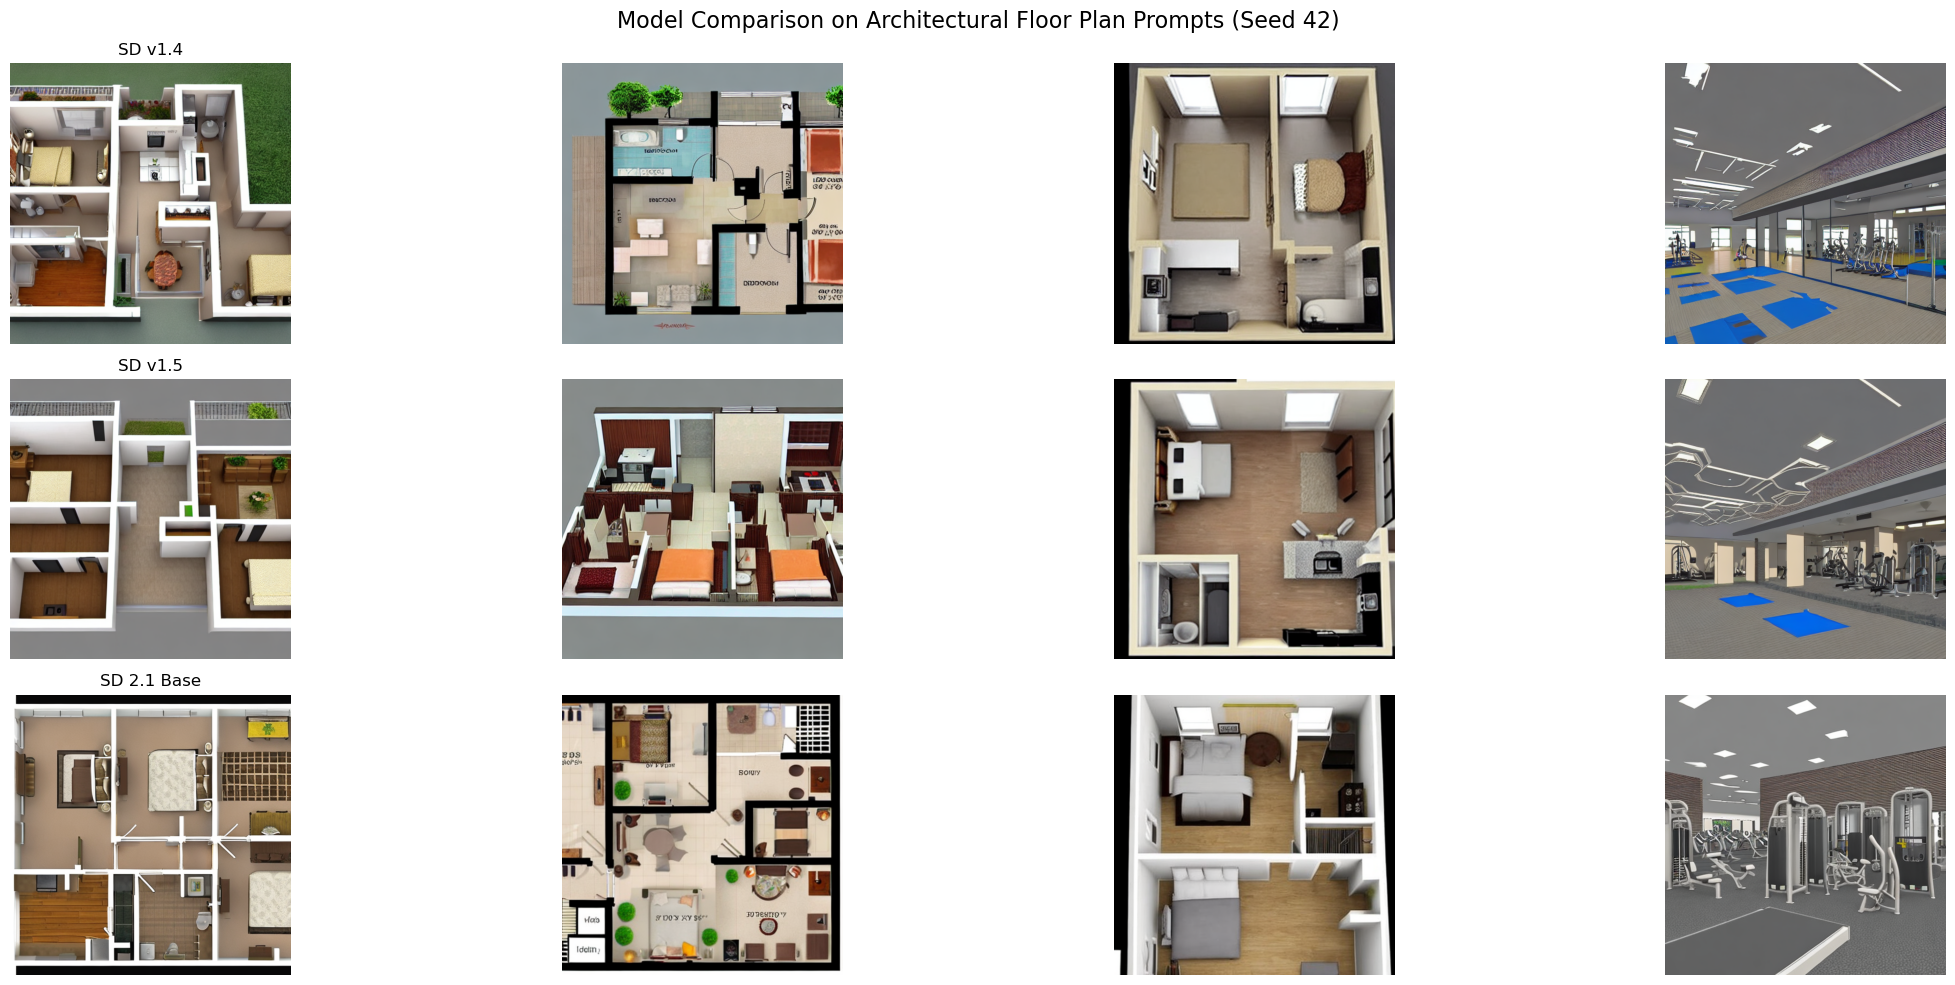

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt
import wandb

# Device and seed setup
device = "cuda" if torch.cuda.is_available() else "cpu"
seed = 42

# Define working models
model_ids = {
    "SD v1.4": "CompVis/stable-diffusion-v1-4",
    "SD v1.5": "runwayml/stable-diffusion-v1-5",
    "SD 2.1 Base": "stabilityai/stable-diffusion-2-1-base"
}

# Prompts for floor plans
prompts = [
    "2BHK apartment floor plan with two bedrooms, living room, kitchen, two bathrooms and a balcony",
    "3BHK apartment layout with master bedroom, two guest bedrooms, three bathrooms, dining area, living room, and kitchen",
    "Studio apartment plan with open bedroom-living space, compact kitchen, and bathroom",
    "Fitness center blueprint with main hall, gym, zumba area, restrooms and lobby"
]

# Generate using a single seed
def generate_images(pipe, prompts, seed=42):
    generator = torch.Generator(device=device).manual_seed(seed)
    return [pipe(prompt, generator=generator).images[0] for prompt in prompts]

# Initialize WandB run
wandb.init(project="architectural_floor_plans", name="model_comparison")

# Log run config to WandB
wandb.config.update({
    "seed": seed,
    "models_compared": list(model_ids.keys()),
    "prompt_count": len(prompts),
    "task": "Architectural Floor Plans"
})

# Generate and log images
all_images = {}
for name, model_id in model_ids.items():
    print(f"Generating from model: {name}")

    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(device)
    images = generate_images(pipe, prompts, seed=seed)
    all_images[name] = images

    # Log each image to WandB with caption
    for i, img in enumerate(images):
        wandb.log({
            f"{name} - Prompt {i+1}": wandb.Image(img, caption=f"{name} | Prompt {i+1}: {prompts[i]}")
        })

# Show the outputs side by side
fig, axs = plt.subplots(len(model_ids), len(prompts), figsize=(24, 10))
for i, (model, images) in enumerate(all_images.items()):
    for j, img in enumerate(images):
        axs[i, j].imshow(img)
        axs[i, j].set_title(model if j == 0 else "")
        axs[i, j].axis("off")
plt.suptitle("Model Comparison on Architectural Floor Plan Prompts (Seed 42)", fontsize=16)
plt.tight_layout()
plt.show()

# Finish the WandB run
wandb.finish()


## Floorplan Comparison Across Models

Now, let us analyze and compare the results of three different Stable Diffusion models — SD v1.4, SD v1.5, and SD 2.1 Base across four architectural prompts: a 2BHK apartment, a 3BHK layout, a studio apartment, and a fitness center blueprint. Each model was evaluated using the same prompt and seed 42 for fairness.

### 1. 2BHK Apartment Floor Plan

**SD v1.4**  
Produced a realistic 3D rendering with natural lighting and well-separated rooms. The bedrooms, kitchen, and living area are clearly distinct, with warm-toned textures that enhance the visual appeal. Best suited for presentation-style floorplans.

**SD v1.5**  
The layout is clean and well-spaced, although somewhat simplified in texture. The rooms are clear and accurate, matching the structure of a typical 2BHK. A practical output for structural drafts.

**SD 2.1 Base**  
More schematic in appearance, offering a clear top-down view of room divisions. The bathroom and kitchen placements are more precise. Overall, the most structurally accurate interpretation.

**Comparison Summary**:  
- SD v1.4 is best for visuals  
- SD 2.1 is best for architectural fidelity  
- SD v1.5 is a good balance between both

### 2. 3BHK Apartment Layout

**SD v1.4**  
Generated a photorealistic view with well-furnished interiors. Rooms are clearly labeled with objects, although the third bedroom is somewhat cramped. Great for visual storytelling.

**SD v1.5**  
Displays a more open structure with distinguishable sleeping areas and shared spaces. Lacks detail in furniture but maintains good room proportions.

**SD 2.1 Base**  
The most spatially accurate output. Clear room boundaries and inclusion of design elements like dining area and en-suite setups. Closest to an actual architectural layout plan.

**Comparison Summary**:  
- SD 2.1 Base leads in functional accuracy  
- SD v1.4 delivers superior interior realism  
- SD v1.5 provides a minimal yet clear layout

### 3. Studio Apartment Plan

**SD v1.4**  
Good lighting, open layout, and visible zoning of bed, living, and kitchen areas. The design feels modern and compact.

**SD v1.5**  
Displays all key components — bedroom, kitchenette, and living area — though with fewer furniture details. Simpler visual style but adheres to the open-plan studio concept well.

**SD 2.1 Base**  
Generates the most space-efficient layout with well-separated areas despite the small footprint. High structural coherence, suitable for floorplan-level planning.

**Comparison Summary**:  
- SD 1.4 wins on realism  
- SD 2.1 wins on layout clarity  
- SD 1.5 delivers a functional and fast result


### 4. Fitness Center Blueprint

**SD v1.4**  
Produced a rich, realistic render of a modern fitness space. Clear visibility of gym equipment and open zumba space. Best suited for showcasing facility design.

**SD v1.5**  
Accurately interprets the zones, with identifiable gym machines and a stylized ceiling. Slight artifacts but holds a good visual flow.

**SD 2.1 Base**  
Cleanest zoning and structural division. Layout includes proper gym areas, mirrors, lighting, and spacing. Architectural fidelity is strongest here.

**Comparison Summary**:  
- SD 2.1 provides the best blueprint-like output  
- SD v1.4 excels in realistic renders  
- SD v1.5 gives a functional mid-point


## Overall Model Comparison

| Prompt                  | Best Visual Quality | Best Layout Accuracy | Best Balanced Output |
|-------------------------|---------------------|-----------------------|-----------------------|
| 2BHK Apartment          | SD v1.4             | SD 2.1 Base           | SD v1.5               |
| 3BHK Apartment          | SD v1.4             | SD 2.1 Base           | SD v1.5               |
| Studio Apartment        | SD v1.4             | SD 2.1 Base           | SD v1.5               |
| Fitness Center Blueprint| SD v1.4             | SD 2.1 Base           | SD v1.5               |

Each model brings unique strengths. **SD v1.4** is visually rich and well-suited for presentation. **SD v1.5** is lightweight and offers clean general-purpose results. **SD 2.1 Base** stands out in structural and spatial fidelity, making it best for technically accurate architectural visualizations.


### Since SD 2.1 Base stands out in structural and spatial fidelity. We will be using it to compare different schedulers.

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Running with DDIM scheduler...


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Running with PNDM scheduler...


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Running with EulerAncestral scheduler...


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

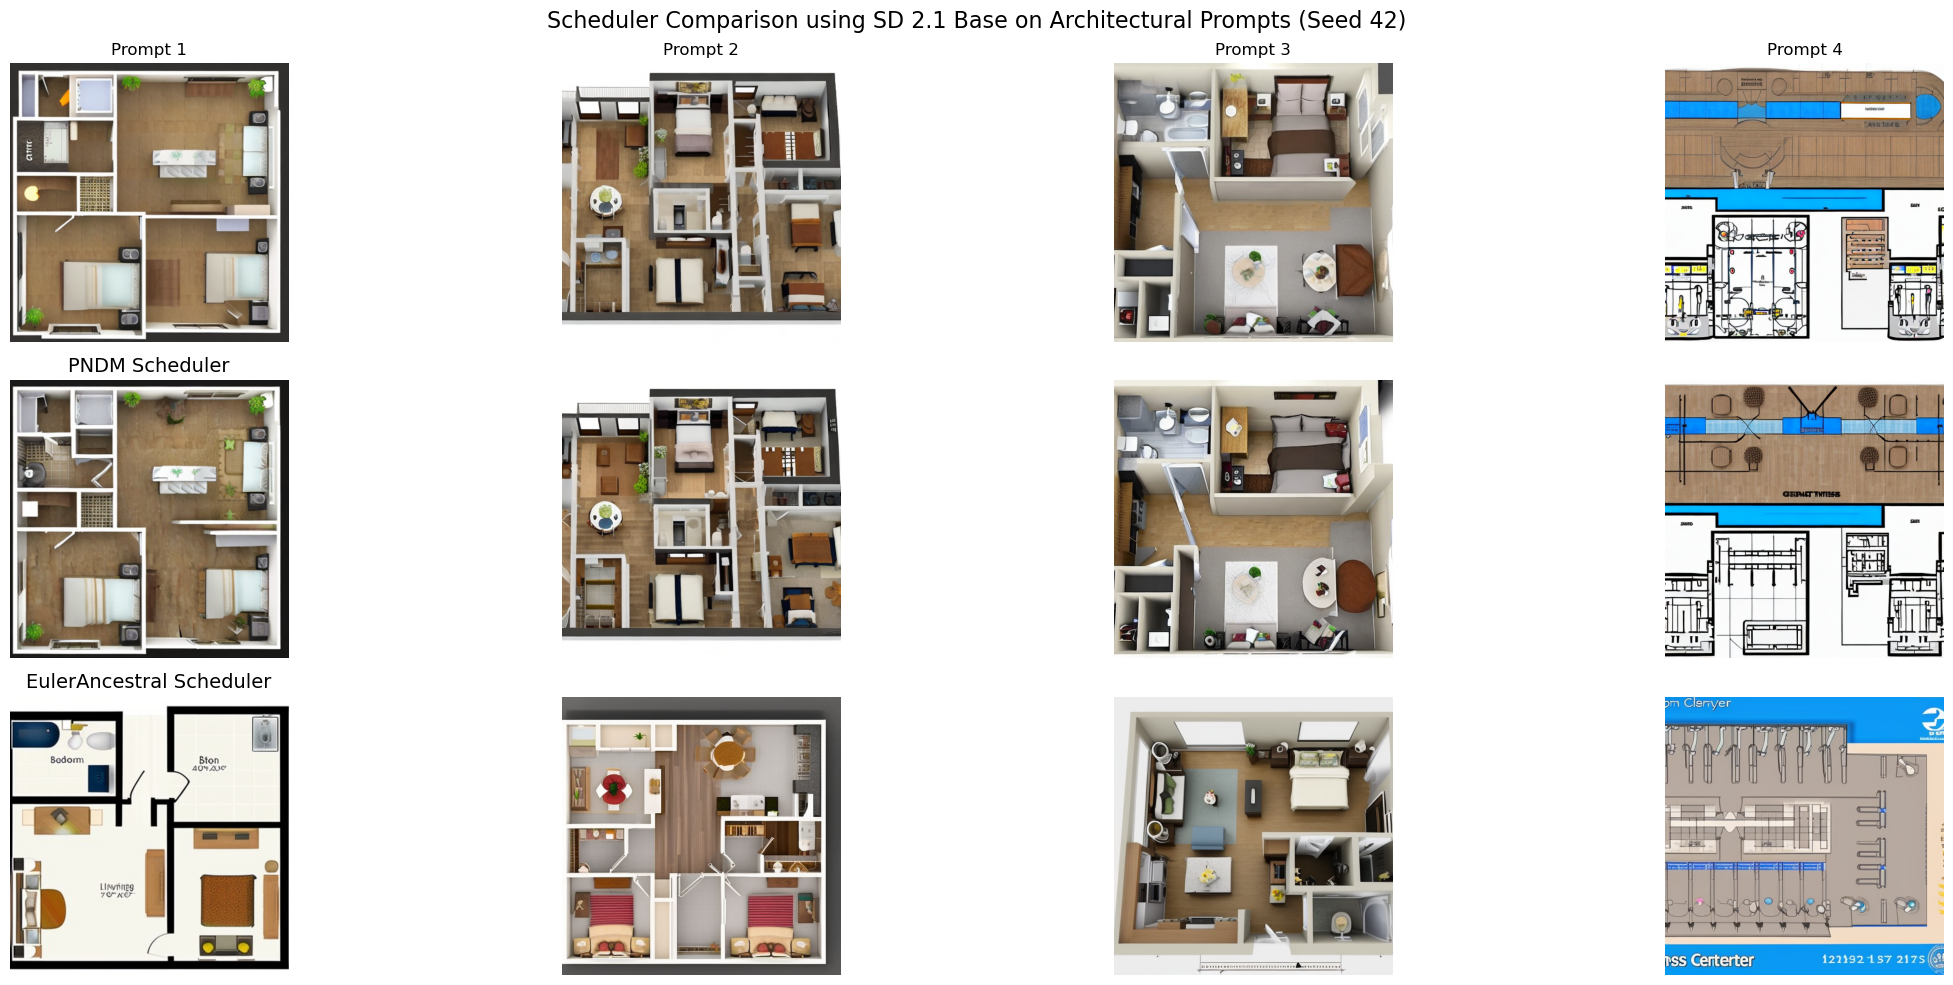

In [ ]:
from diffusers import (
    StableDiffusionPipeline,
    DDIMScheduler,
    PNDMScheduler,
    EulerAncestralDiscreteScheduler
)
import torch
import matplotlib.pyplot as plt

# ---------------- Setup ----------------
device = "mps" if torch.backends.mps.is_available() else "cpu"
seed = 42

prompts = [
    "2BHK apartment floor plan with two bedrooms, living room, kitchen, two bathrooms and a balcony",
    "3BHK apartment layout with master bedroom, two guest bedrooms, three bathrooms, dining area, living room, and kitchen",
    "Studio apartment plan with open bedroom-living space, compact kitchen, and bathroom",
    "Fitness center blueprint with main hall, gym, zumba area, restrooms and lobby"
]

model_id = "stabilityai/stable-diffusion-2-1-base"

# ---------------- Schedulers ----------------
schedulers = {
    "DDIM": DDIMScheduler.from_pretrained(model_id, subfolder="scheduler"),
    "PNDM": PNDMScheduler.from_pretrained(model_id, subfolder="scheduler"),
    "EulerAncestral": EulerAncestralDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
}

# ---------------- Load Base Pipeline ----------------
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float32  # float32 for macOS MPS
).to(device)

# ---------------- Generate Images ----------------
results = {}

for name, scheduler in schedulers.items():
    print(f"Running with {name} scheduler...")
    pipe.scheduler = scheduler
    torch.mps.empty_cache() if device == "mps" else None

    generator = torch.Generator(device=device).manual_seed(seed)
    images = [pipe(prompt, guidance_scale=7.5, num_inference_steps=50, generator=generator).images[0] for prompt in prompts]
    results[name] = images

# ---------------- Display All Results ----------------
fig, axs = plt.subplots(len(schedulers), len(prompts), figsize=(24, 10))

for i, (scheduler_name, images) in enumerate(results.items()):
    for j, img in enumerate(images):
        axs[i, j].imshow(img)
        axs[i, j].axis("off")
        if j == 0:
            axs[i, j].set_title(f"{scheduler_name} Scheduler", fontsize=14)
        if i == 0:
            axs[i, j].set_title(f"Prompt {j+1}", fontsize=12)

plt.suptitle("Scheduler Comparison using SD 2.1 Base on Architectural Prompts (Seed 42)", fontsize=16)
plt.tight_layout()
plt.show()

We evaluated the way different diffusion schedulers influence image generation quality using the same base model (stabilityai/stable-diffusion-2-1-base) and consistent seed (42) across four prompts related to architectural floor plans. Below is a summary of our observations:


### Summary Table

| Prompt         | DDIM                  | PNDM               | Euler Ancestral       |
|----------------|------------------------|--------------------|------------------------|
| **1 (2BHK)**   | Failed / distorted   | Realistic layout | Stylized cartoon     |
| **2 (3BHK)**   | Realistic but soft   | Clean and scalable | Decorative        |
| **3 (Studio)** | Accurate, a bit plain | Best layout     | Cozy & creative      |
| **4 (Gym)**    | Text too noisy       | Clear sections  | Sharp but artsy      |

### Interpretation of Scheduler Comparison


#### **DDIM Scheduler**

**Strengths**  
Tends to produce smoother, more consistent results — especially in smaller or simpler prompts.

**Weaknesses**  
Susceptible to prompt misalignment; for example, the 2BHK floor plan failed to render properly. Text-based elements like in the gym layout became noisy and illegible.

**Conclusion**  
DDIM may be suitable for simpler, well-structured prompts but struggles with complexity or detailed textual elements.



#### **PNDM Scheduler**

**Strengths**  
Delivers the most balanced and technically sound results across all prompts. Room segmentation is clear, structural alignment is consistent, and layouts are scalable and functional.

**Highlight**  
Produced the best studio apartment layout, accurately reflecting an open-plan design with distinct zones.

**Conclusion**  
Best overall scheduler for structured domains like architectural visualization, where spatial clarity and proportion matter.



#### **Euler Ancestral Scheduler**

**Strengths**  
Injects creativity and style into the output — making the results visually engaging and artistically distinct.

**Observations**  
Floor plans leaned towards a stylized, schematic look. In Prompt 4 (gym), machinery and zones were clear, but looked more like a conceptual rendering than a construction-ready blueprint.

**Conclusion**  
Great for conceptual ideation, not ideal for technical precision.



### Final Recommendation

For architectural or layout-sensitive generation tasks:

- **Use PNDM Scheduler**: It balances realism and prompt adherence with architectural clarity.  
- **Avoid DDIM** if prompt reliability is crucial.  
- **Use Euler Ancestral** for creative drafts or early sketches, not production-ready designs.

## Stable Diffusion Parameter Tuning for Architectural Floorplans
In this step, we aim to analyze the effect of key generation parameters in Stable Diffusion — specifically num_inference_steps and guidance_scale — on the quality and accuracy of architectural floorplan images.

The goal is to determine the optimal parameter settings for generating clean, accurate, and visually useful floorplans suitable for use in architectural concept development.
We're using the **Stable Diffusion 2.1 Base model** with a fixed **prompt**:  
> *“A top-down architectural floor plan of a 3BHK modern apartment”*

The goal is to determine the optimal parameter settings for generating clean, accurate, and visually useful floorplans suitable for use in architectural concept development.

---

### What Are We Doing?
- Generating images using **Stable Diffusion** with different combinations of:
  - `num_inference_steps`: controls refinement/detail level.
  - `guidance_scale`: controls how closely the image follows the prompt.

- Using a **fixed prompt and seed** for consistency.

- Logging each result to **Weights & Biases (W&B)** for tracking and visual comparison.

- Displaying results **inline** in the notebook for manual visual inspection.

---

### Parameters Being Tuned

| Parameter             | Description                                                                 | Values Tested          |
|-----------------------|-----------------------------------------------------------------------------|------------------------|
| `num_inference_steps` | Number of denoising steps during generation. Higher = more refined image.   | 20, 50, 100            |
| `guidance_scale`      | Controls how strongly the model is guided by the text prompt.               | 5.0, 7.5, 12.0         |

---

###  Why These Parameters Matter

- **`num_inference_steps`**
  - More steps → better detail and cleaner structure.
  - Too low → artifacts or unfinished-looking floorplans.
  - Too high → longer compute time.

- **`guidance_scale`**
  - Low scale → more creativity, but may drift from the prompt.
  - High scale → stricter adherence to prompt, but may introduce distortion.
  - Balance is key for realistic and structured output.

---

### Expected Outcomes

- Determine which combinations yield:
  - Clear room boundaries
  - Accurate spatial layout (e.g., 3 bedrooms, kitchen, living space)
  - Visually realistic or schematically useful outputs

In [1]:
pip install diffusers transformers accelerate torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Logged: Steps=20 | Guidance=7.5


  0%|          | 0/50 [00:00<?, ?it/s]

Logged: Steps=50 | Guidance=7.5


  0%|          | 0/50 [00:00<?, ?it/s]

Logged: Steps=50 | Guidance=12.0


  0%|          | 0/100 [00:00<?, ?it/s]

Logged: Steps=100 | Guidance=5.0


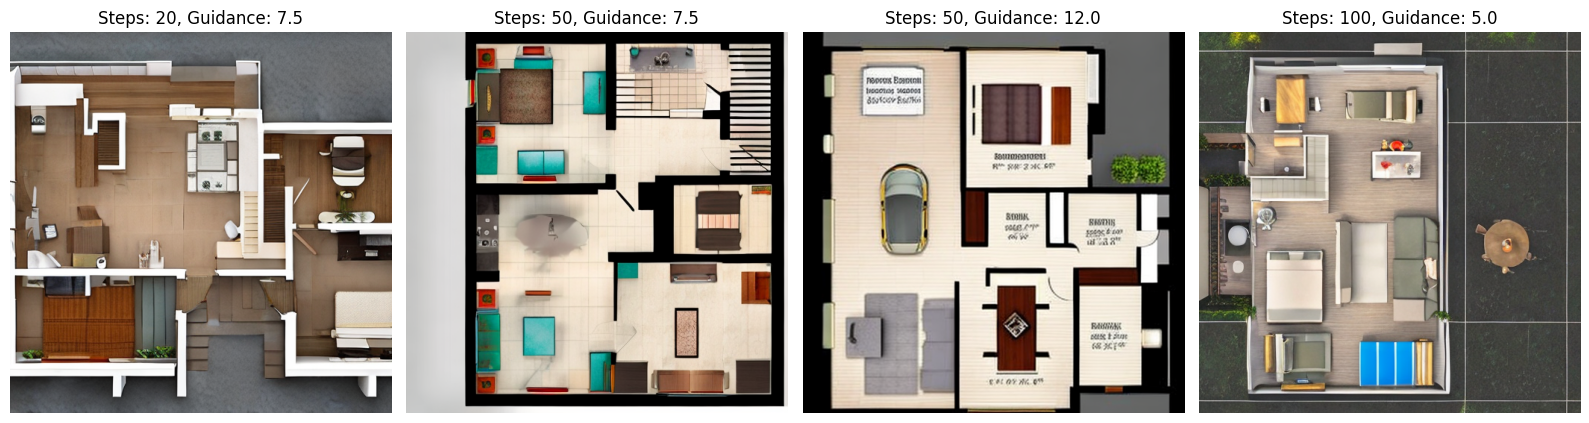

In [3]:
import wandb
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

# Initialize W&B project
wandb.init(project="Diffusers", entity="usf-alpha-neurons", name="Floorplan Comparison")

# Load the Stable Diffusion model
model_id = "stabilityai/stable-diffusion-2-1-base"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# Prompt and seed
prompt = "A top-down architectural floor plan of a 3BHK modern apartment"
seed = 42
generator = torch.Generator("cuda").manual_seed(seed)

# Parameter variations
params = [
    {"steps": 20, "guidance": 7.5},
    {"steps": 50, "guidance": 7.5},
    {"steps": 50, "guidance": 12.0},
    {"steps": 100, "guidance": 5.0}
]

# Initialize lists to store images and titles for inline display
images = []
titles = []

# Generate and log images
for p in params:
    output = pipe(
        prompt=prompt,
        num_inference_steps=p["steps"],
        guidance_scale=p["guidance"],
        generator=generator
    )
    image = output.images[0]

    # Save for inline display
    images.append(image)
    titles.append(f"Steps: {p['steps']}, Guidance: {p['guidance']}")

    # Log to W&B
    wandb.log({
        "prompt": prompt,
        "steps": p["steps"],
        "guidance_scale": p["guidance"],
        "output_image": wandb.Image(image, caption=f"Steps: {p['steps']}, Guidance: {p['guidance']}")
    })

    print(f"Logged: Steps={p['steps']} | Guidance={p['guidance']}")

# Show all images inline in the notebook
plt.figure(figsize=(16, 8))
for i, img in enumerate(images):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(img)
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()

# Finish the W&B run
wandb.finish()


##  Inference from Stable Diffusion Parameter Tuning Results

Based on the generated images using different combinations of `num_inference_steps` and `guidance_scale`, here's the visual analysis and insights:


###  Parameter-wise Observations

| **Steps** | **Guidance Scale** | **Observations** | **Inference** |
|-----------|--------------------|------------------|----------------|
| **20**    | **7.5**             | Realistic render with textures, but room segmentation is unclear. Structural definition is weak. | Fewer steps lead to quicker results but compromise spatial clarity. Not suitable for technical layout tasks. |
| **50**    | **7.5**             | Well-balanced output: clear zones, visible rooms, and functional structure. | Best overall configuration for architectural planning. Good balance between clarity, realism, and prompt adherence. |
| **50**    | **12.0**            | Strong prompt alignment with visible room labels. Slightly artificial look with over-sharpened elements. | High guidance improves label/text clarity but may introduce visual distortion. Suitable when text fidelity matters. |
| **100**   | **5.0**             | Photorealistic render with soft lighting and natural feel. Room layout is creative but lacks technical structure. | High step count with low guidance enhances aesthetics, not ideal for precise floorplans. Best for concept visuals. |


### Key Takeaways

- **Best for Blueprint Clarity:**  
  `Steps = 50`, `Guidance = 7.5`  
  → Produces structured and clean layouts ideal for architectural use cases.

- **Best for Realism/Render Quality:**  
  `Steps = 100`, `Guidance = 5.0`  
  → Visually pleasing and natural, suitable for showcasing design intent.

- **Best for Text and Label Accuracy:**  
  `Steps = 50`, `Guidance = 12.0`  
  → Good for room annotations or labeled layouts.

- **Least Effective (Structurally):**  
  `Steps = 20`, `Guidance = 7.5`  
  → Fast generation but lacks room definition and layout fidelity.

### Recommendation post hyperparameter Tuning

For generating usable and accurate **architectural floorplans**:
- Use **50 inference steps** for a good balance between speed and detail.
- Set **guidance scale between 7.5 and 9.0** to maintain prompt alignment without overfitting.
- Avoid extreme values unless specifically targeting artistic or rapid concept generation.



# **Conclusion**

###  Summary of Experiment

This experiment systematically explored the capabilities of **Stable Diffusion models** in generating architectural floorplans using the following dimensions:

1. **Model Comparisons (SD v1.4, v1.5, 2.1 Base)**  
   - **SD v1.4**: Best for visual quality and realistic rendering.
   - **SD v1.5**: Good balanced output — practical and lightweight.
   - **SD 2.1 Base**: Best for architectural layout precision and spatial fidelity.

2. **Scheduler Comparison (DDIM, PNDM, Euler Ancestral)**  
   - **PNDM**: Most reliable for clean, structured, blueprint-like outputs.
   - **Euler Ancestral**: Great for conceptual or stylized visuals.
   - **DDIM**: Smooth outputs but prone to prompt misalignment and artifacts.

3. **Hyperparameter Tuning (`num_inference_steps`, `guidance_scale`)**  
   - **50 steps with guidance scale 7.5** gave the most consistent and accurate results.
   - Higher guidance improves adherence but may introduce artifacts.
   - More steps refine image details but increase computation time.



###  Final Insights

- **SD 2.1 Base + PNDM + steps=50 + guidance=7.5** is the most effective pipeline for generating accurate and usable architectural floorplans.
- Fine control over parameters and prompt wording significantly impacts output clarity and fidelity.
- The system performs best for **clean zoning and spatial layouts**, but still struggles with textual elements and architectural symbols.


###  Future Scope

To take this experiment further and move toward a production-quality solution:

####  1. Fine-Tuning the Model
- Use **LoRA** or **DreamBooth** to fine-tune on real architectural floorplans.
- Introduce tokens like `<2BHK-layout>` to guide structural formats better.

####  2. Guided Generation via ControlNet
- Apply **ControlNet** using edge maps, segmentation masks, or sketched layouts as conditioning input to generate highly controlled outputs.

####  3. Prompt Engineering & Automation
- Develop prompt templates dynamically based on floorplan type, size, and required features.
- Automate prompt scaling with metadata or building code inputs.

####  4. Evaluation Metrics
- Integrate quantitative metrics for image similarity (e.g., SSIM, LPIPS), segmentation accuracy, or zoning layout correctness using AI-based validators.

####  5. CAD/Blueprint Export
- Build a pipeline to vectorize generated floorplans for import into **CAD tools** or **BIM systems**.


###  Long-Term Vision

- Develop a **generative design assistant** that can take natural language requirements and output architectural concepts at scale.
- Use diffusion models as a **co-creation tool** for architects and interior designers in early planning and ideation phases.

